In [1]:
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data_1 = pd.read_csv('/Users/rifatalam/Desktop/Shikho Competitor Analysis/2021 Analysis.csv')

/Users/rifatalam/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,2,13,14,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data_1.head()

,date,Month,cust_id,transaction_id,reference_id,segment,session_key,price,original_price,sku_id,...,utm_source,utm_campaign,utm_content,utm_term,platform,discount_code,affiliate_code,campaign,attribution,transaction_verified
0,31/01/2021,1,164835,601649309a444,6016493081c4f,skillup,BE71CB03B22DFA9F2DB0C0FCAD967542,450.0,4500.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct,COMPLETED
1,31/01/2021,1,78876,6016d66a59c7c,40644yrkklcbo6x,store,5709F36271E7C9E20ADFD454156B2FEA,97.0,410.0,16.0,...,NaN,NaN,NaN,NaN,app,NaN,NaN,NaN,direct,COMPLETED
2,31/01/2021,1,164836,60164932452ef,40644yrkkkqst2o,store,B006E4D1BA6BC551EBA882CB85C6656A,97.0,410.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,fbg122,NaN,affiliate,COMPLETED
3,31/01/2021,1,165561,6016d6d25d24e,40644yrkklcdwd6,store,DCDAB06137017B51D200672AB6492D74,97.0,410.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,fbg122,NaN,affiliate,COMPLETED
4,31/01/2021,1,154618,60164a7ef2d14,60164a7ed44a4,skillup,C4C7B27A646F2DF021BFC60665786390,450.0,4500.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct,COMPLETED


Exploratory Data Analytics

In [4]:
print(len(data_1))

328773


In [5]:
#Counting number of repeat users
dup_uid = data_1.pivot_table(index = ['cust_id'],aggfunc = 'size')
print(dup_uid)

cust_id
1                                 6
8                                 1
13                                2
31                                1
46                                1
                                 ..
99494                             1
99510                             1
Imranjahedulislam812@gmail com    1
farhana612108872@gmail.com        1
support@10minuteschool.com        1
Length: 293135, dtype: int64


In [6]:
#identifying non-numeric customer IDs
print(data_1[pd.to_numeric(data_1['cust_id'], errors='coerce').isnull()])

         date    Month                         cust_id transaction_id  \
142656  Emran  #VALUE!  Imranjahedulislam812@gmail com    8.80165E+12   
253963  Emran  #VALUE!      support@10minuteschool.com    8.80165E+12   
284731  Akter  #VALUE!      farhana612108872@gmail.com    8.80161E+12   

       reference_id segment session_key  price  original_price  sku_id  ...  \
142656          NaN     NaN         NaN    NaN             NaN     NaN  ...   
253963          NaN     NaN         NaN    NaN             NaN     NaN  ...   
284731          NaN     NaN         NaN    NaN             NaN     NaN  ...   

        utm_source utm_campaign utm_content utm_term platform discount_code  \
142656         NaN          NaN         NaN      NaN      NaN           NaN   
253963         NaN          NaN         NaN      NaN      NaN           NaN   
284731         NaN          NaN         NaN      NaN      NaN           NaN   

       affiliate_code campaign attribution transaction_verified  
142656 

In [7]:
#removing non-numeric customer IDs
data_2 = data_1[data_1['cust_id'].apply(lambda x: isinstance(x, (int, np.int64)))]

In [8]:
#checing if non-numeric customer IDs exist
print(data_2[pd.to_numeric(data_2['cust_id'], errors='coerce').isnull()])

Empty DataFrame
Columns: [date, Month, cust_id, transaction_id, reference_id, segment, session_key, price, original_price, sku_id, prod_id, product, aff_cat_name, tenms_id, store_uid, cus_name, cus_email, cus_phone, utm_medium, utm_source, utm_campaign, utm_content, utm_term, platform, discount_code, affiliate_code, campaign, attribution, transaction_verified]
Index: []

[0 rows x 29 columns]


In [9]:
data_2 = data_2[data_2['price']>0]

In [10]:
#identifying repeat customers
data_3 = data_2.groupby(['cust_id'])['transaction_id'].aggregate('count').reset_index().sort_values('transaction_id', ascending=False)
data_3.rename(columns={'transaction_id':'count_of_transactions'}, inplace=True)
print(data_3)


        cust_id  count_of_transactions
189992   728718                     28
83737    299831                     20
69307    266689                     17
117882   409910                     17
185813   717632                     16
...         ...                    ...
78911    289522                      1
78912    289525                      1
78913    289531                      1
78914    289532                      1
201059   750940                      1

[201060 rows x 2 columns]


In [11]:
len(data_3['cust_id'])

201060

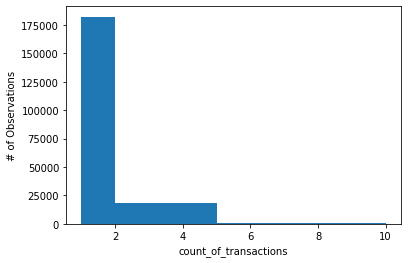

In [12]:
#not identifiable
fig, ax = plt. subplots()
ax.hist(data_3['count_of_transactions'],bins = [1,2,5,10])
ax.set_xlabel('count_of_transactions')
ax.set_ylabel('# of Observations')
plt.show()

In [42]:
bins_cut = [-np.inf,2,5,10,20,np.inf]
labels = ['0-1','2-5','5-10','10-20','>20']
data_3['binned'] = pd.cut(data_3['count_of_transactions'], bins=bins_cut,labels=labels)

In [44]:
print(data_3)

        cust_id  count_of_transactions binned
189992   728718                     28    >20
83737    299831                     20  10-20
69307    266689                     17  10-20
117882   409910                     17  10-20
185813   717632                     16  10-20
...         ...                    ...    ...
78911    289522                      1    0-1
78912    289525                      1    0-1
78913    289531                      1    0-1
78914    289532                      1    0-1
201059   750940                      1    0-1

[201060 rows x 3 columns]


In [46]:
data_3['binned'].value_counts()

0-1      197114
2-5        3629
5-10        282
10-20        34
>20           1
Name: binned, dtype: int64

<AxesSubplot:xlabel='binned', ylabel='count'>

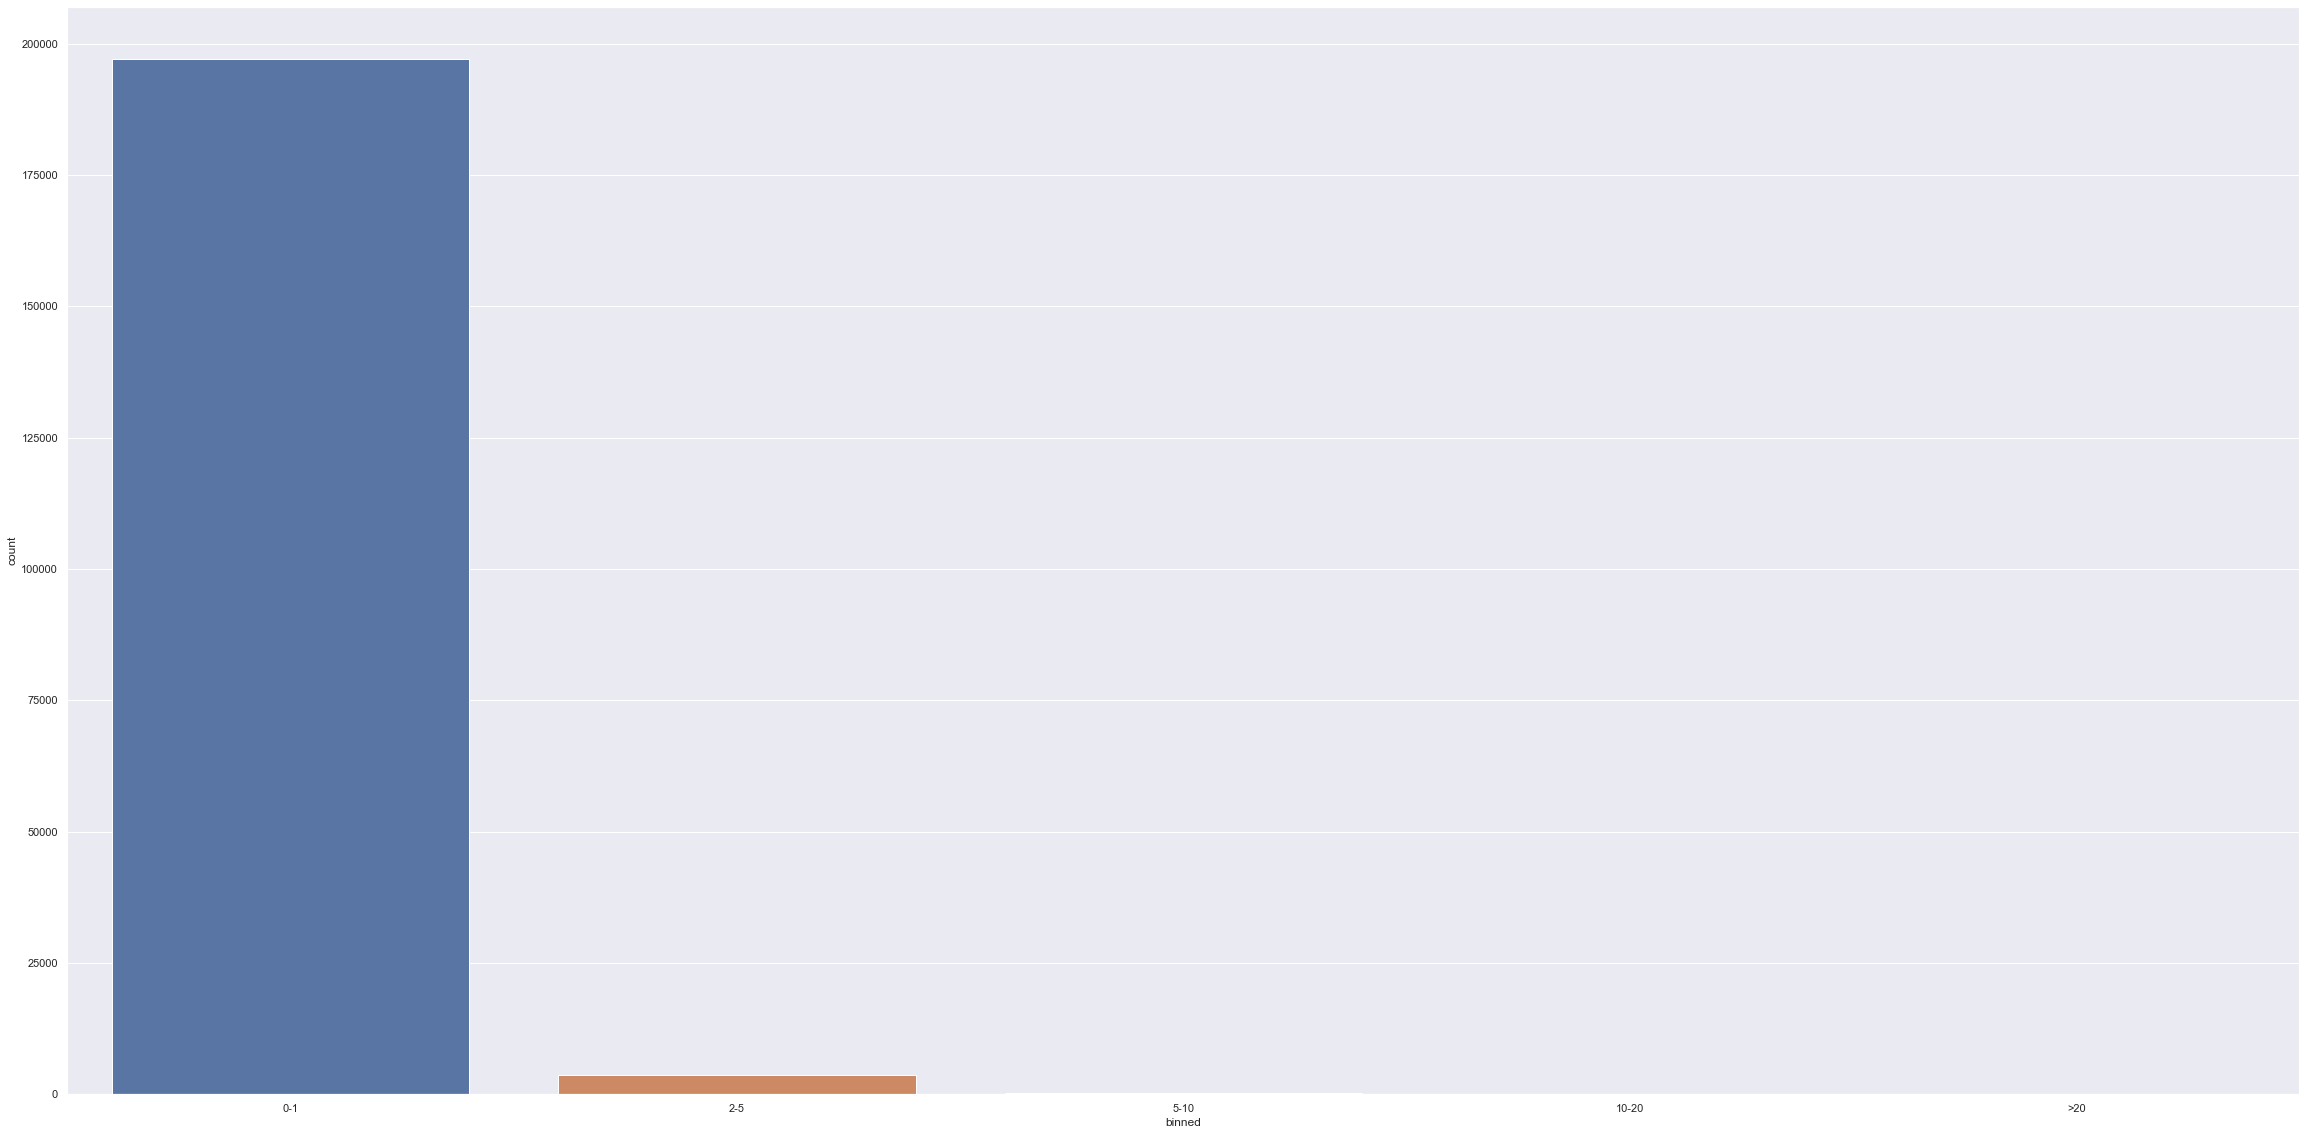

In [47]:
sns.countplot(data = data_3,x = 'binned')

It is seen that there are only 3 users who had done more than 20 transactions with 10MS. However, there are almost 339 users who had done between 5-10 transactions with 10MS

In [48]:
#segmenting binned cust_IDs for deeper analysis
#custid_segment_1 is the collection of 339 userIDs who made between 5-10 purchases
segment_1 = data_3[data_3['binned'] == '5-10']
custid_segment_1 = segment_1['cust_id'].to_list()
print(custid_segment_1)

[383003, 412573, 374999, 456826, 733507, 458692, 325497, 545261, 426250, 740510, 281584, 253606, 411564, 320803, 686969, 454198, 259237, 727487, 715354, 297327, 677004, 267247, 302547, 729768, 459103, 303104, 619921, 250807, 738266, 724375, 247977, 210090, 388046, 269354, 529560, 413399, 271189, 63194, 571615, 269070, 403529, 269769, 294478, 283172, 365078, 265919, 368784, 454326, 326040, 371320, 262999, 440639, 514930, 736405, 511390, 301628, 471240, 283992, 340238, 275251, 441144, 248621, 288333, 262623, 287519, 562966, 187525, 456019, 187489, 192286, 296757, 736376, 323944, 343923, 98176, 42195, 182886, 187420, 310251, 517022, 258873, 42197, 187663, 303503, 300466, 250580, 254211, 271306, 187829, 191238, 277249, 386437, 570828, 385479, 191214, 552401, 187742, 187696, 454838, 429148, 187378, 218419, 748453, 689832, 524575, 542936, 192172, 259374, 542003, 360655, 684761, 445893, 282594, 443784, 299749, 687084, 405163, 283611, 721762, 413799, 307439, 289760, 719703, 677415, 192266, 397

In [18]:
#filtering dataset with segment_1 custIDs
segment_1_data = data_2[data_2['cust_id'].isin(custid_segment_1)]

In [19]:
segment_1_data.head()

,date,Month,cust_id,transaction_id,reference_id,segment,session_key,price,original_price,sku_id,...,utm_source,utm_campaign,utm_content,utm_term,platform,discount_code,affiliate_code,campaign,attribution,transaction_verified
1959,26/01/2021,1,42195,601019b525c30,601019b50f544,special-course,AC36972362018398ACDC6DB21F772246,95.0,9500.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct,COMPLETED
4484,14/01/2021,1,42194,5fff3f789fd6b,5fff3f7876b5f,admission,CBB4335790B6B6B8914E9A03A911441B,10.0,2500.0,100.0,...,facebook,skills-regular,skills-poster,saif-o,NaN,sagartest222,test,NaN,organic,COMPLETED
7080,04/01/2021,1,42194,5ff245a3d973d,5ff245a3bcbcb,admission,5377A3D6F438874049CD3A5DAB8CFFFE,10.0,2500.0,101.0,...,facebook,skills-regular,skills-poster,saif-o,NaN,test420,test,NaN,organic,COMPLETED
7410,04/01/2021,1,42195,5ff2d553c4eb3,5ff2d553967a3,admission,58C5C4CE7B10029D0367EA1ACB0171DC,12.0,2500.0,104.0,...,NaN,NaN,NaN,NaN,NaN,Test22,NaN,NaN,direct,COMPLETED
11451,28/02/2021,2,63194,603bb53e5b3ae,eewk2sklpay81s,store,4F07BAA108FA001874FAAD0A9BBEB0DC,97.0,410.0,12.0,...,NaN,NaN,NaN,NaN,app,NaN,NaN,NaN,direct,COMPLETED


In [49]:
segment_1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 1959 to 328565
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  1967 non-null   object 
 1   Month                 1967 non-null   object 
 2   cust_id               1967 non-null   object 
 3   transaction_id        1967 non-null   object 
 4   reference_id          1967 non-null   object 
 5   segment               1967 non-null   object 
 6   session_key           1967 non-null   object 
 7   price                 1967 non-null   float64
 8   original_price        1967 non-null   float64
 9   sku_id                1967 non-null   float64
 10  prod_id               1967 non-null   float64
 11  product               1967 non-null   object 
 12  aff_cat_name          274 non-null    object 
 13  tenms_id              1880 non-null   object 
 14  store_uid             87 non-null     object 
 15  cus_name        

In [50]:
segment_1_data['attribution'] = segment_1_data['attribution'].fillna('none')
segment_1_data['segment'] = segment_1_data['segment'].fillna('no segment')

/var/folders/2n/lzktspt52nx__8zbl0zj3vyc0000gn/T/ipykernel_50680/3636820481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_1_data['attribution'] = segment_1_data['attribution'].fillna('none')
/var/folders/2n/lzktspt52nx__8zbl0zj3vyc0000gn/T/ipykernel_50680/3636820481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_1_data['segment'] = segment_1_data['segment'].fillna('no segment')


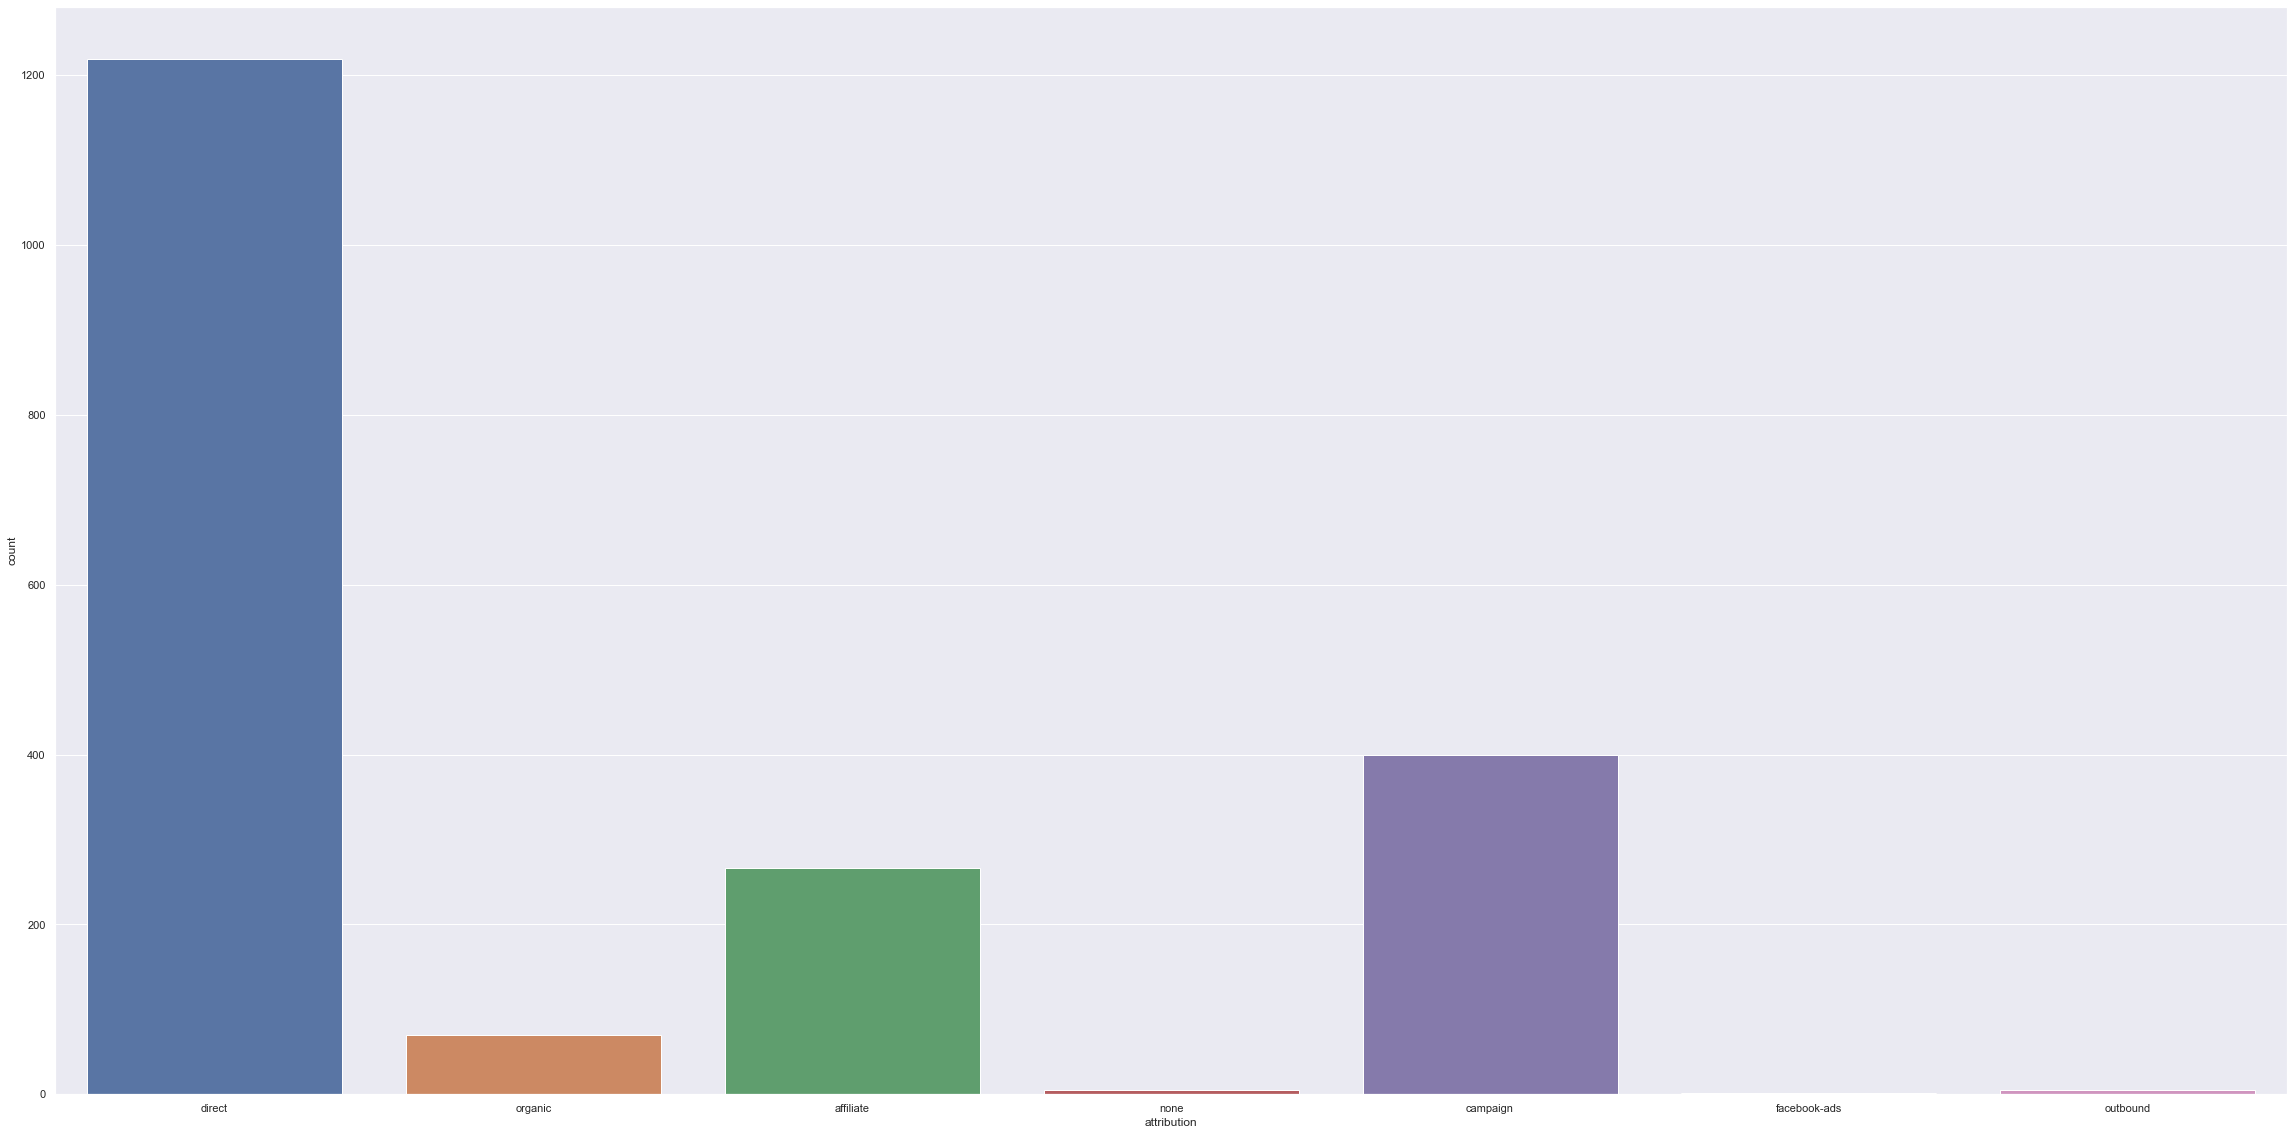

In [51]:
sns.countplot(data = segment_1_data,x = 'attribution')
sns.set(rc={'figure.figsize':(13,20)})

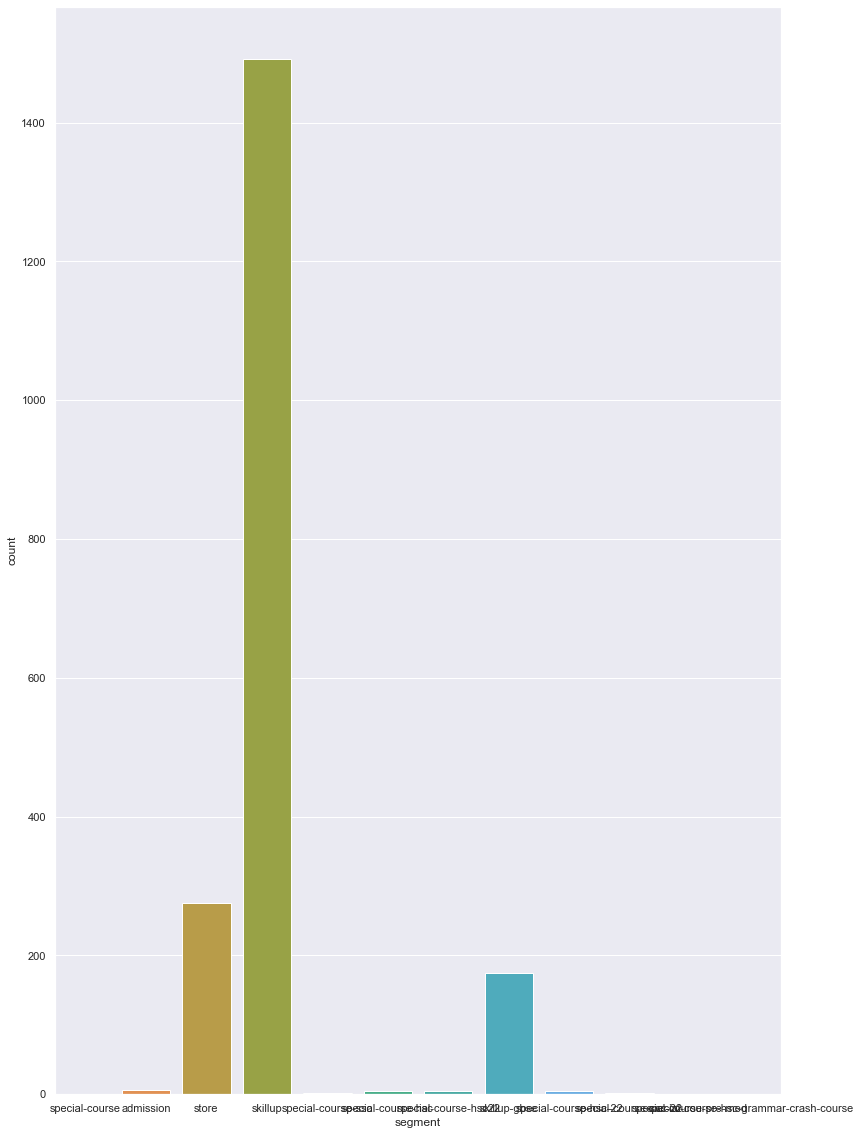

In [52]:
sns.countplot(data = segment_1_data,x = 'segment')
sns.set(rc={'figure.figsize':(40,20)})

Now Using Market Baseket Analysis to figure out most recuuring sales SKUs

In [53]:
#adding a column quantity for every customer and every sale
segment_1_data['quantity'] = 1

/var/folders/2n/lzktspt52nx__8zbl0zj3vyc0000gn/T/ipykernel_50680/4266361910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_1_data['quantity'] = 1


In [54]:
segment_1_data.head()

,date,Month,cust_id,transaction_id,reference_id,segment,session_key,price,original_price,sku_id,...,utm_campaign,utm_content,utm_term,platform,discount_code,affiliate_code,campaign,attribution,transaction_verified,quantity
1959,26/01/2021,1,42195,601019b525c30,601019b50f544,special-course,AC36972362018398ACDC6DB21F772246,95.0,9500.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct,COMPLETED,1
4484,14/01/2021,1,42194,5fff3f789fd6b,5fff3f7876b5f,admission,CBB4335790B6B6B8914E9A03A911441B,10.0,2500.0,100.0,...,skills-regular,skills-poster,saif-o,NaN,sagartest222,test,NaN,organic,COMPLETED,1
7080,04/01/2021,1,42194,5ff245a3d973d,5ff245a3bcbcb,admission,5377A3D6F438874049CD3A5DAB8CFFFE,10.0,2500.0,101.0,...,skills-regular,skills-poster,saif-o,NaN,test420,test,NaN,organic,COMPLETED,1
7410,04/01/2021,1,42195,5ff2d553c4eb3,5ff2d553967a3,admission,58C5C4CE7B10029D0367EA1ACB0171DC,12.0,2500.0,104.0,...,NaN,NaN,NaN,NaN,Test22,NaN,NaN,direct,COMPLETED,1
11451,28/02/2021,2,63194,603bb53e5b3ae,eewk2sklpay81s,store,4F07BAA108FA001874FAAD0A9BBEB0DC,97.0,410.0,12.0,...,NaN,NaN,NaN,app,NaN,NaN,NaN,direct,COMPLETED,1


In [55]:
basket_data = (segment_1_data
          .groupby(['cust_id', 'product'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('cust_id'))

In [56]:
basket_data.head()

product,24 Ghontay Quran Shikhi,BCS,BCS Preliminary Course,Business Studies,Cadet College Admission Course 2021,Career Guidance,Cartoon Drawing & Animation,Chemistry Bundle,Cluster Admission Crash Course 2021,Communication Hacks,...,সবার জন্য Vocabulary,সাধারণ গণিত-অষ্টম শ্রেণি,সাধারণ গণিত-চতুর্থ শ্রেণি,সাধারণ গণিত-তৃতীয় শ্রেণি,সাধারণ গণিত-পঞ্চম শ্রেণি,সাধারণ বিজ্ঞান-অষ্টম শ্রেণি,সাধারণ বিজ্ঞান-পঞ্চম শ্রেণি,সাধারণ বিজ্ঞান-সপ্তম শ্রেণি,সুন্দর ও দ্রুত ইংরেজি হাতের লেখা,সুন্দর ও দ্রুত বাংলা হাতের লেখা
cust_id,,,,,,,,,,,,,,,,,,,,,
33108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42194,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42195,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
	if(x<= 0):
		return 0
	if(x>= 1):
		return 1

# Encoding the datasets
basket_encoded = basket_data.applymap(hot_encode)
basket_data = basket_encoded

In [58]:
basket_data.head()

product,24 Ghontay Quran Shikhi,BCS,BCS Preliminary Course,Business Studies,Cadet College Admission Course 2021,Career Guidance,Cartoon Drawing & Animation,Chemistry Bundle,Cluster Admission Crash Course 2021,Communication Hacks,...,সবার জন্য Vocabulary,সাধারণ গণিত-অষ্টম শ্রেণি,সাধারণ গণিত-চতুর্থ শ্রেণি,সাধারণ গণিত-তৃতীয় শ্রেণি,সাধারণ গণিত-পঞ্চম শ্রেণি,সাধারণ বিজ্ঞান-অষ্টম শ্রেণি,সাধারণ বিজ্ঞান-পঞ্চম শ্রেণি,সাধারণ বিজ্ঞান-সপ্তম শ্রেণি,সুন্দর ও দ্রুত ইংরেজি হাতের লেখা,সুন্দর ও দ্রুত বাংলা হাতের লেখা
cust_id,,,,,,,,,,,,,,,,,,,,,
33108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42194,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42195,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
42197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52585,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Building the model
frq_items = apriori(basket_data, min_support = 0.01, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                             antecedents  \
324                     (HSC 2022: English. Bangla. ICT)   
325                              (HSC Crash Course 2022)   
10599  (Ghore Boshe Ay Korun, HSC Chemistry 1st Paper...   
10602  (HSC Physics 1st Paper Interactive Guide, Grap...   
10641  (Ghore Boshe Ay Korun, HSC Chemistry 2nd Paper...   

                                             consequents  antecedent support  \
324                              (HSC Crash Course 2022)            0.014184   
325                     (HSC 2022: English. Bangla. ICT)            0.014184   
10599  (HSC Physics 1st Paper Interactive Guide, Grap...            0.014184   
10602  (Ghore Boshe Ay Korun, HSC Chemistry 1st Paper...            0.014184   
10641  (HSC Physics 1st Paper Interactive Guide, Grap...            0.010638   

       consequent support   support  confidence  lift  leverage  conviction  
324              0.014184  0.014184         1.0  70.5  0.013983         inf  
32

In [60]:
# Building the model
frq_items = apriori(basket_data, min_support = 0.0001, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules_1 = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules_1 = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                             antecedents  \
324                     (HSC 2022: English. Bangla. ICT)   
325                              (HSC Crash Course 2022)   
10599  (Ghore Boshe Ay Korun, HSC Chemistry 1st Paper...   
10602  (HSC Physics 1st Paper Interactive Guide, Grap...   
10641  (Ghore Boshe Ay Korun, HSC Chemistry 2nd Paper...   

                                             consequents  antecedent support  \
324                              (HSC Crash Course 2022)            0.014184   
325                     (HSC 2022: English. Bangla. ICT)            0.014184   
10599  (HSC Physics 1st Paper Interactive Guide, Grap...            0.014184   
10602  (Ghore Boshe Ay Korun, HSC Chemistry 1st Paper...            0.014184   
10641  (HSC Physics 1st Paper Interactive Guide, Grap...            0.010638   

       consequent support   support  confidence  lift  leverage  conviction  
324              0.014184  0.014184         1.0  70.5  0.013983         inf  
32

In [61]:
len(rules_1)

30332

In [62]:
rules_1["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_1["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [64]:
rule_csv = rules_1.to_csv('rules_original.csv')

/Users/rifatalam/Library/Python/3.8/lib/python/site-packages/matplotlib/axes/_axes.py:6794: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


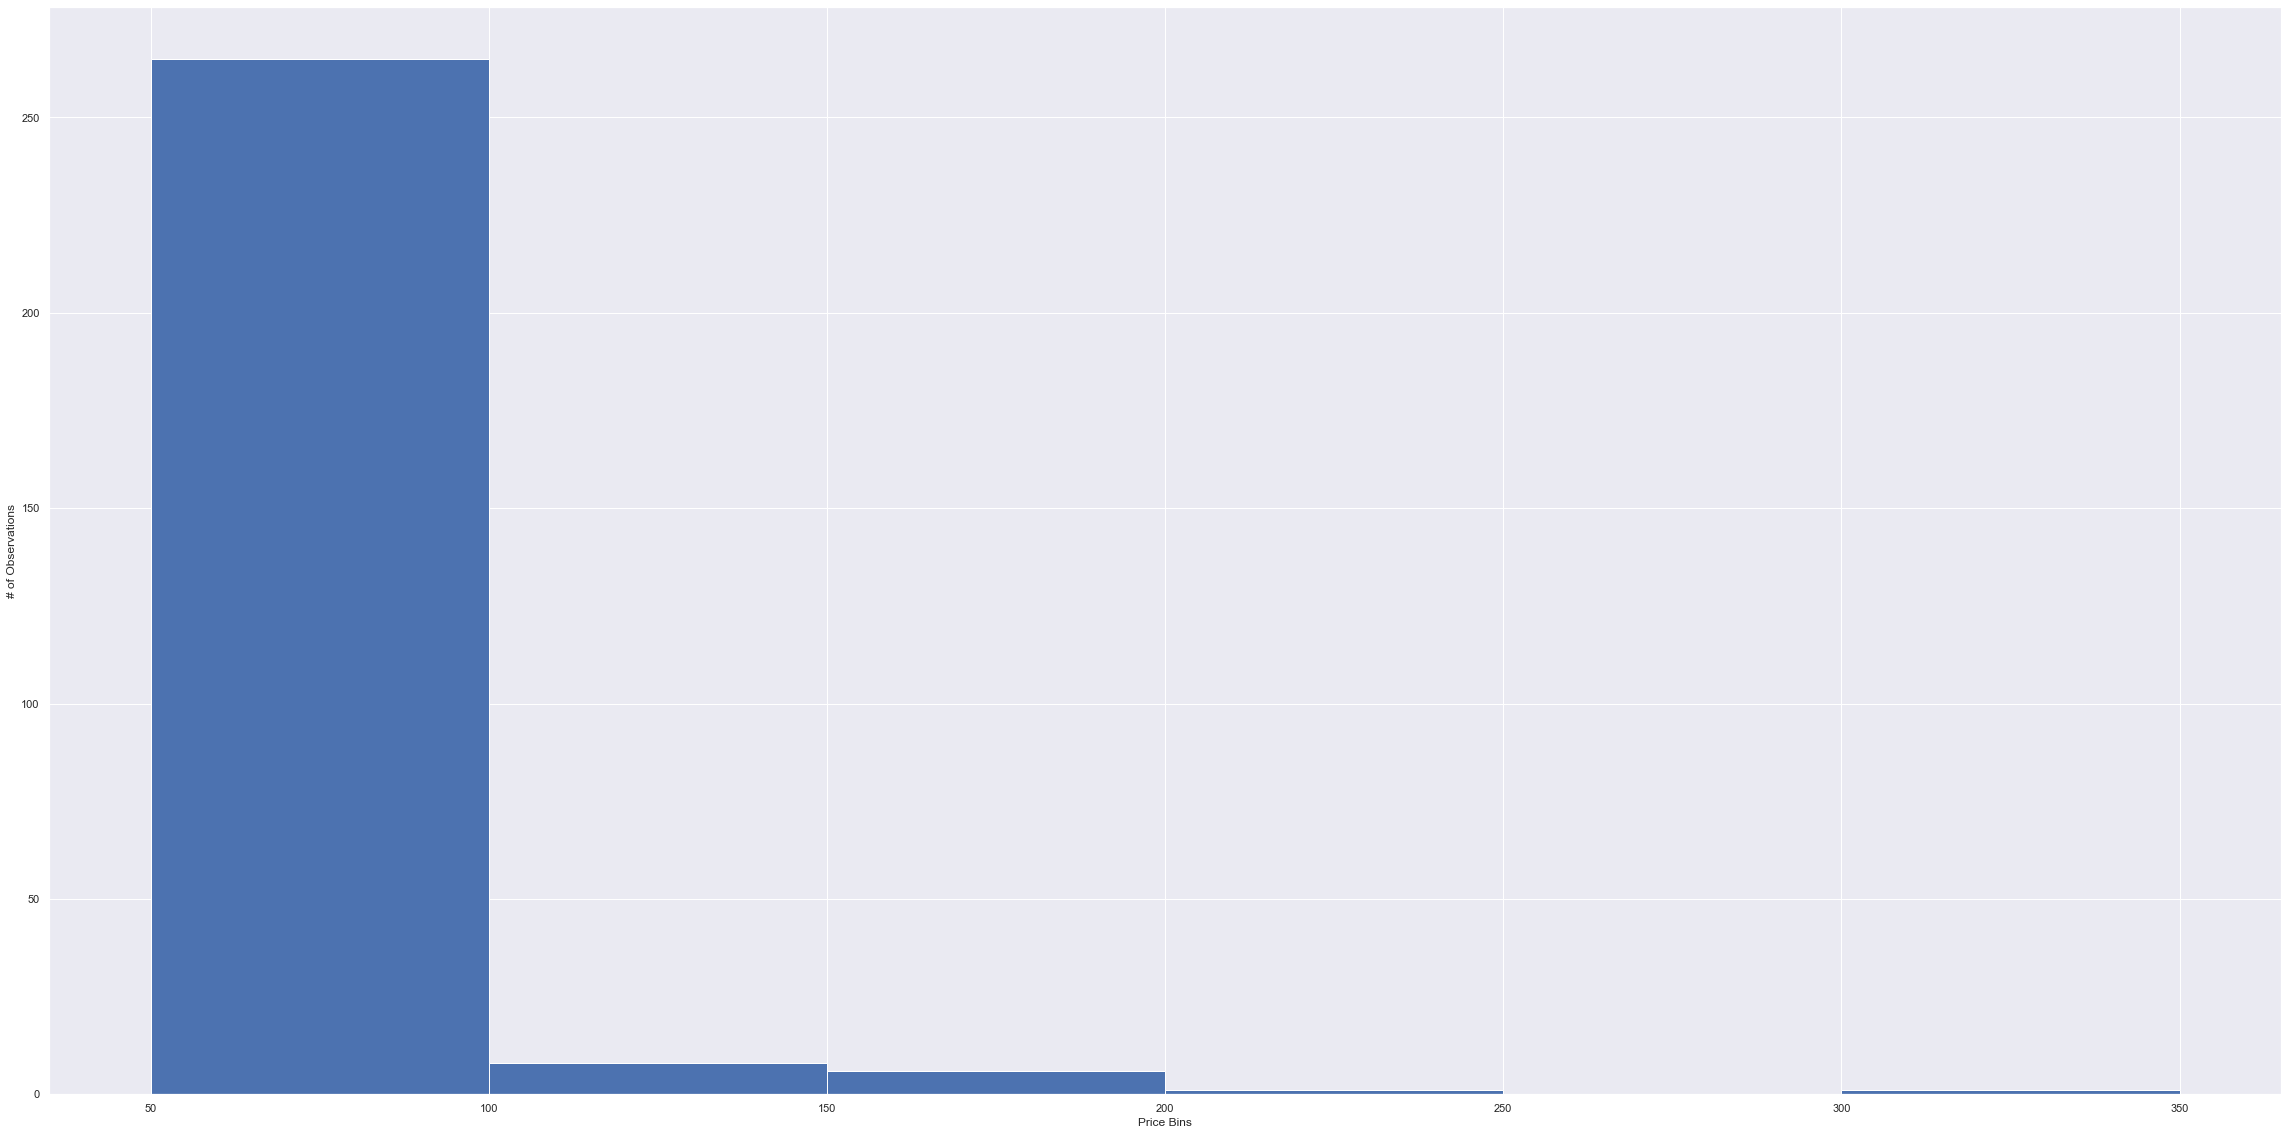

In [69]:
fig, ax = plt. subplots()
ax.hist(segment_1_data['price'],bins = [50,100,150,200,250,300,350,np.inf])
ax.set_xlabel('Price Bins')
ax.set_ylabel('# of Observations')
plt.show()

/Users/rifatalam/Library/Python/3.8/lib/python/site-packages/matplotlib/axes/_axes.py:6794: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


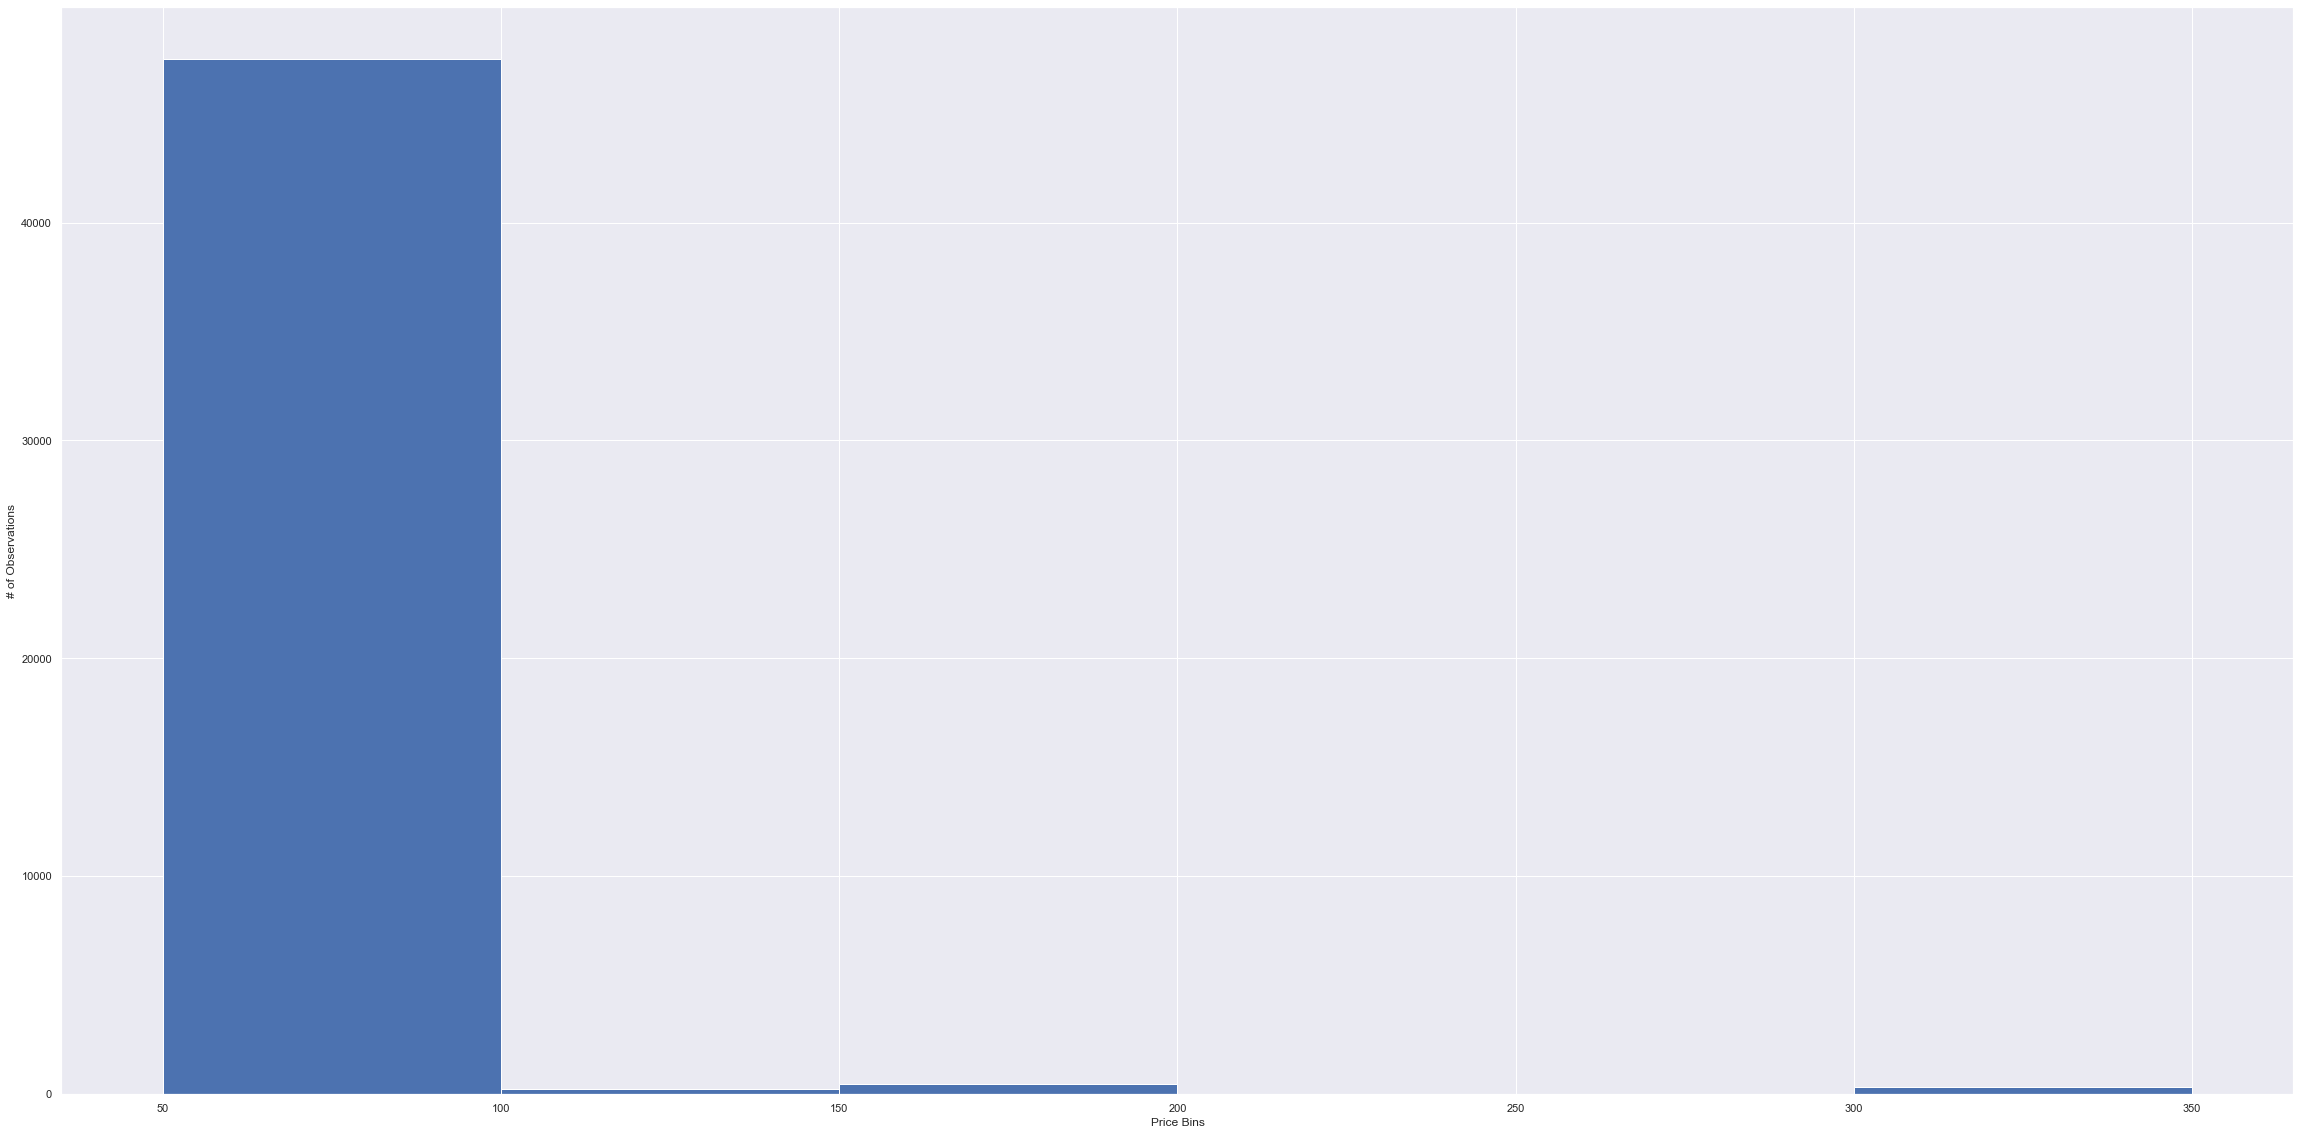

In [70]:
fig,ax = plt.subplots()
ax.hist(data_2['price'],bins = [50,100,150,200,250,300,350,np.inf])
ax.set_xlabel('Price Bins')
ax.set_ylabel('# of Observations')
plt.show()

In [83]:
bins_cut = [-np.inf,50,51,100,101,200,201,300,301,350,351,500,501,1000,1001,2000,2001,3000,np.inf]
data_2['binned'] = pd.cut(data_2['price'], bins=bins_cut)

In [84]:
data_2['binned'].value_counts()

(351.0, 500.0]      120051
(51.0, 100.0]        45930
(501.0, 1000.0]      22348
(301.0, 350.0]       18654
(1001.0, 2000.0]     14710
(2001.0, 3000.0]      2078
(-inf, 50.0]          1876
(101.0, 200.0]         544
(3000.0, inf]          425
(201.0, 300.0]          14
(50.0, 51.0]             0
(300.0, 301.0]           0
(500.0, 501.0]           0
(1000.0, 1001.0]         0
(200.0, 201.0]           0
(2000.0, 2001.0]         0
(100.0, 101.0]           0
(350.0, 351.0]           0
Name: binned, dtype: int64